In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

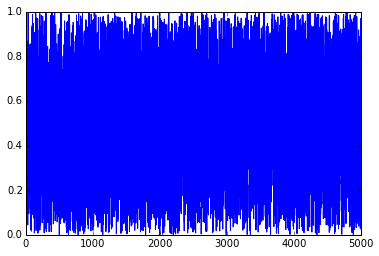

In [28]:
tsz=5000
dr0 = np.random.rand(tsz)
plt.plot(dr0)

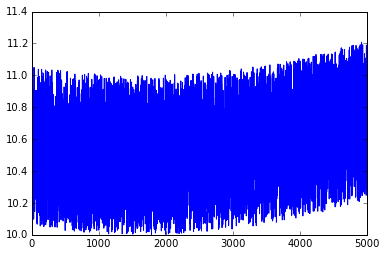

In [29]:
t = np.arange(tsz)
dz = 0.5*((t-tsz/3.0)/tsz)**2+10.0+dr0
plt.plot(t,dz)

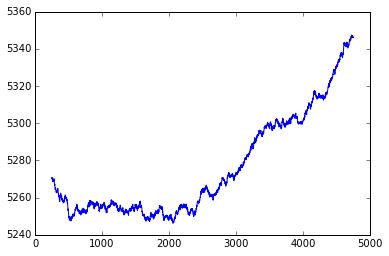

In [30]:
import scipy.signal as sig
slen = 500
dzs = sig.fftconvolve(dz,np.ones(slen),mode='full')
plt.plot(t[slen/2:-(slen/2+1)],dzs[slen:-slen])


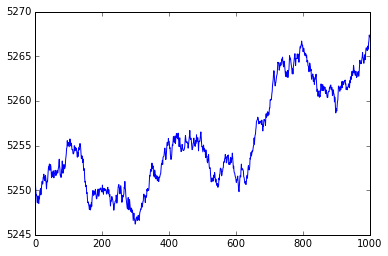

In [102]:
offs = 1500
dzss = dzs[slen+10+offs:slen+1010+offs]
plt.plot(dzss)

In [103]:
N=10
Fc=10.0
Fs=1000.0

ct = Fc/Fs/2
# provide them to firwin
h=sig.firwin( numtaps=Fs+1, cutoff=ct, window='hamming')

y=sig.lfilter( h, 1.0, dzs) # 'x' is the time-series data you are filtering


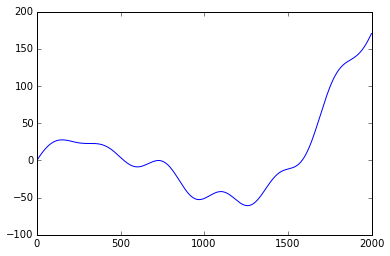

In [104]:
zraw = y[1500:3500]-y[1500] 
plt.plot(15*zraw)

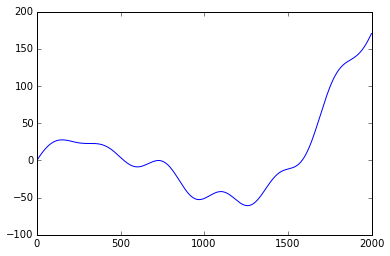

In [86]:
import TrackerSim as Tracker
import sampleTimeCourse as STC
import opsim
bp = opsim.rawpiezoSimNoisy(readerr=5.0,moverr=10.0)
op = opsim.piezoOffsetSim(bp)
sampletc = STC.sampleTC(10,rawz=15*zraw,mode='raw')
plt.plot(sampletc._t,sampletc._z)

In [91]:
tr = Tracker.Tracker(op,sampletc,dzerr=10.0)
tr.track(tolerance=30,minDelay=50,useposDelta=False)
t, dz, poffset, pos, samplez, focus  = np.array(tr.history).T

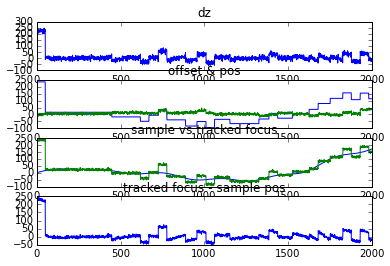

In [92]:
tr.plothistory()

(-50, 50)

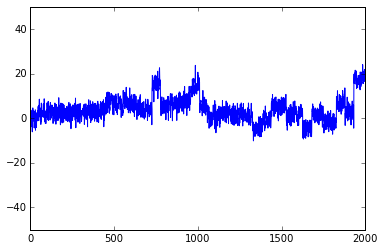

In [96]:
ztrack = pos
plt.plot(t,0.5*pos)
plt.ylim(-50,50)

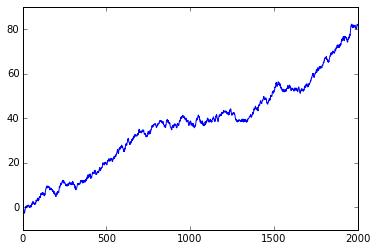

In [100]:
xtrack = dzs[2900:4900]-dzs[2900]
plt.plot(t,xtrack)

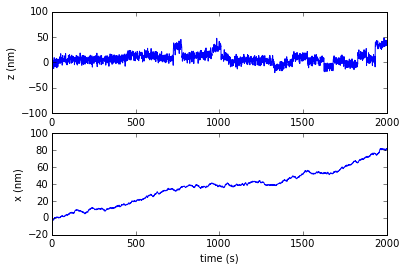

In [108]:
plt.subplot(2,1,1)
plt.plot(t,pos)
plt.ylim(-100,100)
plt.ylabel('z (nm)')

plt.subplot(2,1,2)
plt.plot(t,xtrack)
plt.ylabel('x (nm)')
plt.ylim(-20,100)
plt.xlabel('time (s)')

In [109]:
data = np.column_stack((t,xtrack,pos))
data.shape

(2000, 3)

In [110]:
np.savetxt("responsetracks.csv", data, delimiter=",")